In [16]:
import pickle
import numpy as np

# Open the pickle file for reading
with open('emg_day_one.pkl', 'rb') as file:
    # Load the data from the file
    x = pickle.load(file)

# Do something with the data
import pickle
import numpy as np

# Open the pickle file for reading
with open('kinematics_day_one.pkl', 'rb') as file:
    # Load the data from the file
    y = pickle.load(file)

# Do something with the data
x.keys()

dict_keys(['fist_slow', 'twoFPinch_slow', 'index_slow', 'rest_slow'])

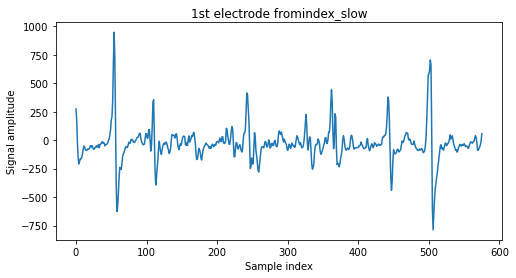

In [17]:
import matplotlib.pyplot as plt
# data visualization
task = 2
num_chunks = 10


# Get the first task in the dictionary
task_key = list(x.keys())[task]
task_data = x[task_key] # 720,1,320,64

# Get the first electrode and the first 10 samples

signal_chunk = task_data[1:num_chunks,0,1]
signal = np.concatenate(signal_chunk, axis=-1)

# Plot the samples
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(signal)
ax.set_xlabel('Sample index')
ax.set_ylabel('Signal amplitude')
ax.set_title(f'1st electrode from{task_key}')
plt.show()

#  TODO: what filter should be used ? 

In [3]:
# # filtering the data 

# from scipy.signal import savgol_filter

# # Define the filtering parameters
# window_size = 21

# # Loop over all tasks in the dictionary
# for task_key in x.keys():
#     task_data = x[task_key]
    
#     # Loop over all electrodes and chunks in the task data
#     for electrode_idx in range(task_data.shape[2]):
#         num_chunks = task_data.shape[0]
#         chunk_size = task_data.shape[3]
#         signal_chunks = task_data[:, 0, electrode_idx, :]

#         # Square the signal
#         squared_signal_chunks = np.square(signal_chunks)

#         # Compute the RMS of the squared signal using a rolling window with a size of 10 samples
#         rms_signal_chunks = np.sqrt(savgol_filter(squared_signal_chunks, window_size, 2, axis=-1, mode='nearest'))

#         # Replace the original signal data with the filtered data
#         task_data[:, 0, electrode_idx, :] = rms_signal_chunks

#     # Update the data dictionary with the filtered data for the current task
#     x[task_key] = task_data



<ipython-input-3-67176f0e39d6>:22: RuntimeWarning: invalid value encountered in sqrt
  rms_signal_chunks = np.sqrt(savgol_filter(squared_signal_chunks, window_size, 2, axis=-1, mode='nearest'))


In [18]:
np.shape(x['fist_slow']),np.shape(y['fist_slow'])


((720, 1, 320, 64), (720, 63))

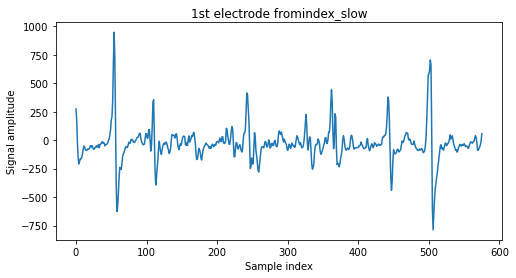

In [19]:
# data visualization
task = 2
num_chunks = 10


# Get the first task in the dictionary
task_key = list(x.keys())[task]
task_data = x[task_key] # 720,1,320,64

# Get the first electrode and the first 10 samples

signal_chunk = task_data[1:num_chunks,0,1]
signal = np.concatenate(signal_chunk, axis=-1)

# Plot the samples
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(signal)
ax.set_xlabel('Sample index')
ax.set_ylabel('Signal amplitude')
ax.set_title(f'1st electrode from{task_key}')
plt.show()

In [34]:
val_data = np.zeros((4, 72, 320, 64))
test_data = np.zeros((4, 72, 320, 64))
train_data = np.zeros((4, 576, 320, 64))

for i, key in enumerate(x.keys()):
    data = x[key]
    val_data[i] = data[:72][0][np.newaxis]
    test_data[i] = data[72:144][0][np.newaxis]
    train_data[i] = data[144:][0][np.newaxis]


val_labels = np.zeros((4, 72, 63))
test_labels = np.zeros((4, 72, 63))
train_labels = np.zeros((4, 576, 63))

for i, key in enumerate(y.keys()):
    data = y[key]
    val_labels[i] = data[:72]
    test_labels[i] = data[72:144]
    train_labels[i] = data[144:]



np.shape(val_data),np.shape(test_data),np.shape(train_data)

((4, 72, 320, 64), (4, 72, 320, 64), (4, 576, 320, 64))

In [33]:
np.shape(val_labels),np.shape(test_labels),np.shape(train_labels)

((4, 72, 63), (4, 72, 63), (4, 576, 63))

In [65]:
np.shape(train_data[4])

IndexError: index 4 is out of bounds for axis 0 with size 4

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Reshape



# Define input shape
input_shape = (576, 320, 64)

# Define number of output features
num_output_features = 63

# Define model architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(576 * num_output_features))  # output shape: (batch_size, 576 * 63)
model.add(Activation('linear'))
model.add(Reshape((576, num_output_features)))  # reshape to desired output shape: (batch_size, 576, 63))


# Compile the model

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 70, 318, 32)       18464     
                                                                 
 batch_normalization_62 (Bat  (None, 70, 318, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 35, 159, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 33, 157, 64)       18496     
                                                                 
 batch_normalization_63 (Bat  (None, 33, 157, 64)      256       
 chNormalization)                                                
                                                     

In [60]:
model.compile(loss=Huber(delta=1.0), optimizer=Adam(learning_rate=0.001))
model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))


Epoch 1/10


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_18" is incompatible with the layer: expected shape=(None, 72, 320, 64), found shape=(None, 576, 320, 64)
